In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite2d_vrel'
run_name = 'ac'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

In [10]:
# READING THE ENVIRONMENTAL PARAMETERS
env_params = ut.read_params(data_dir+'param_env.txt')
print(env_params)

{'int_steps': 0.0005, 'ep_length': 50.0, 'decision_time': 0.05, 'init_theta': 0.7853981633974483, 'init_dtheta': 0.0, 'init_alpha': 12.0, 'wind_type': 1.0, 'k_wind': 0.5, 'eps_wind': 0.2}


In [32]:
# WRITING THE EVALUATION PARAMETERS
params = dict()
params['ev_time'] = 50 # sec
params['ep_length'] = 50 # sec. the episode length is overwritten during the evaluation
params['traj_points'] = 1000
params['gamma'] = 1
ut.write_params(params, data_dir, 'param_ev.txt')

In [21]:
# COMPILING C++ SCRIPT
comp_list = np.array(["g++", "-o", "evaluate.exe", "evaluate.cpp", "../lib/eval.cpp", "../lib/utils.cpp", "../lib/wind.cpp", 
                      "../lib/envs/kite.cpp", "../lib/envs/kite2d.cpp", "-std=c++17"])
comp_str = ""
for s in comp_list: comp_str+=s+" "
print('To compile from terminal: ')
print(comp_str)

To compile from terminal: 
g++ -o evaluate.exe evaluate.cpp ../lib/eval.cpp ../lib/utils.cpp ../lib/wind.cpp ../lib/envs/kite.cpp ../lib/envs/kite2d.cpp -std=c++17 


In [42]:
s_traj, s_labels = ut.read_traj(data_dir+'ev_states.txt')
aux_m, aux_l = ut.read_traj(data_dir+'ev_return.txt')
returns = aux_m[:,0]
ep_length = aux_m[:,1]

In [43]:
returns

array([633.827])

In [44]:
period = [50, 50]
def stream_vel(x, y):
    aux1 = np.sin(np.pi*x/period[0])
    aux2 = np.sin(np.pi*y/period[1])
    e = env_params['eps_wind']
    k = env_params['k_wind']
    vx = 0.5*k*y*(2*e*aux1*aux2 + e*np.pi*y/period[1]*aux1*np.cos(np.pi*y/period[1]) + 2)
    vy = -k*e*np.pi*y*y/(2*period[0])*np.cos(np.pi*x/period[0])*aux2;
    return vx, vy

Text(0, 0.5, 'y-axis')

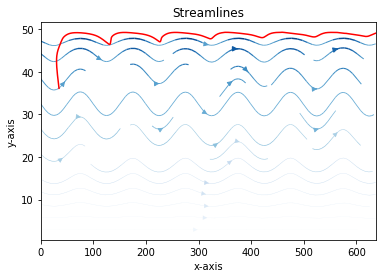

In [45]:
Lx, Ly = np.max(s_traj[:,0]), 50
Y, X = np.mgrid[0:Ly:300j, 0:Lx:300j]
U, V = stream_vel(X,Y)
speed = np.sqrt(U*U + V*V)
plt.streamplot(X, Y, U, V, density=0.6, color=speed, linewidth=speed*0.05, cmap=plt.cm.Blues)
plt.plot(s_traj[:,0], s_traj[:,1], c='red')
plt.title('Streamlines')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

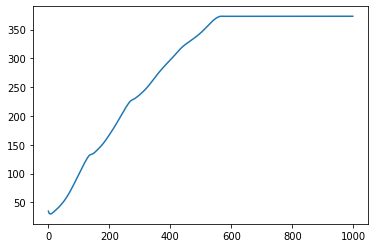

In [37]:
plt.plot(s_traj[:,0])

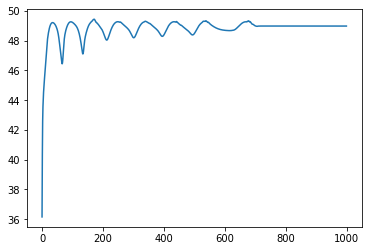

In [31]:
plt.plot(s_traj[:,1])

In [108]:
print(s_traj[0,0], s_traj[0,1])
print(s_traj[599,0], s_traj[599,1])

34.5825 36.1479
157.27 49.4108
